In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [0]:
mb_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)
X_dim = mnist.train.images.shape[1]
y_dim = mnist.train.labels.shape[1]
h_dim = 128


W0827 08:52:05.017318 139763744782208 deprecation.py:323] From <ipython-input-3-861407bd78f2>:4: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0827 08:52:05.023954 139763744782208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0827 08:52:05.027266 139763744782208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz


W0827 08:52:05.586061 139763744782208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0827 08:52:05.588535 139763744782208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0827 08:52:05.668062 139763744782208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
X = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None,y_dim])
D_W1 = tf.Variable(xavier_init([X_dim+y_dim, h_dim]))
D_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

D_W2 = tf.Variable(xavier_init([h_dim, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]

In [0]:
Z = tf.placeholder(tf.float32, shape=[None, Z_dim])

G_W1 = tf.Variable(xavier_init([Z_dim+y_dim, h_dim]))
G_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

G_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

theta_G = [G_W1, G_W2, G_b1, G_b2]


In [0]:
def discriminator(x,y):
    D_h1 = tf.nn.relu(tf.matmul(tf.concat(axis=1,values=[x,y]), D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit



def generator(z,y):
    
    G_h1 = tf.nn.relu(tf.matmul(tf.concat(axis=1,values=[z,y]), G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob

In [0]:
G_sample = generator(Z,y)
D_real, D_logit_real = discriminator(X,y)
D_fake, D_logit_fake = discriminator(G_sample,y)

D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)


W0827 08:52:25.636751 139763744782208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:






sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

for it in range(1000000):
    if it % 1000 == 0:
        y_sample = np.zeros(shape=[16, y_dim])
        y_sample[:, 7] = 1
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim),y:y_sample})

        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, y_mb = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim),y:y_mb})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim),y:y_mb})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
print()

Iter: 0
D loss: 1.216
G_loss: 2.888
Iter: 1000
D loss: 0.009709
G_loss: 12.38
Iter: 2000
D loss: 0.00717
G_loss: 7.703
Iter: 3000
D loss: 0.03858
G_loss: 7.897
Iter: 4000
D loss: 0.06092
G_loss: 5.937
Iter: 5000
D loss: 0.1948
G_loss: 6.491
Iter: 6000
D loss: 0.4267
G_loss: 5.035
Iter: 7000
D loss: 0.4381
G_loss: 4.019
Iter: 8000
D loss: 0.4447
G_loss: 3.593
Iter: 9000
D loss: 0.453
G_loss: 3.53
Iter: 10000
D loss: 0.7587
G_loss: 3.243
Iter: 11000
D loss: 0.7098
G_loss: 3.685
Iter: 12000
D loss: 0.6642
G_loss: 2.66
Iter: 13000
D loss: 0.67
G_loss: 2.85
Iter: 14000
D loss: 0.8635
G_loss: 2.303
Iter: 15000
D loss: 0.7044
G_loss: 2.205
Iter: 16000
D loss: 0.7605
G_loss: 2.286
Iter: 17000
D loss: 0.8748
G_loss: 1.918
Iter: 18000
D loss: 0.7182
G_loss: 2.056
Iter: 19000
D loss: 0.709
G_loss: 2.062
Iter: 20000
D loss: 0.7707
G_loss: 2.124
Iter: 21000
D loss: 0.8261
G_loss: 1.837
Iter: 22000
D loss: 0.7989
G_loss: 1.969
Iter: 23000
D loss: 0.8279
G_loss: 1.982
Iter: 24000
D loss: 0.8493
G_los

In [0]:
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig




sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

for it in range(100000):
    if it % 1000 == 0:
        y_sample = np.zeros(shape=[16, y_dim])
        y_sample[:, 7] = 1
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim),y:y_sample})

        fig = plot(samples)
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, y_mb = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim),y:y_mb})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim),y:y_mb})

    if it % 1000 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()

Iter: 0
D loss: 1.638
G_loss: 2.009

Iter: 1000
D loss: 0.009696
G_loss: 7.059

Iter: 2000
D loss: 0.02141
G_loss: 6.295

Iter: 3000
D loss: 0.02724
G_loss: 5.914

Iter: 4000
D loss: 0.08424
G_loss: 7.032

Iter: 5000
D loss: 0.2228
G_loss: 6.006

Iter: 6000
D loss: 0.3219
G_loss: 5.185

Iter: 7000
D loss: 0.3476
G_loss: 5.058

Iter: 8000
D loss: 0.5753
G_loss: 3.09

Iter: 9000
D loss: 0.4306
G_loss: 3.047

Iter: 10000
D loss: 0.5349
G_loss: 2.832

Iter: 11000
D loss: 0.4459
G_loss: 3.321

Iter: 12000
D loss: 0.7216
G_loss: 2.732

Iter: 13000
D loss: 0.4937
G_loss: 2.626

Iter: 14000
D loss: 0.8283
G_loss: 2.238

Iter: 15000
D loss: 0.6987
G_loss: 2.481

Iter: 16000
D loss: 0.7758
G_loss: 1.933

Iter: 17000
D loss: 0.7898
G_loss: 2.125

Iter: 18000
D loss: 0.6781
G_loss: 1.954

Iter: 19000
D loss: 0.7643
G_loss: 1.84

Iter: 20000
D loss: 0.6595
G_loss: 1.847

Iter: 21000
D loss: 0.7339
G_loss: 2.101

Iter: 22000
D loss: 0.8839
G_loss: 1.667

Iter: 23000
D loss: 0.9118
G_loss: 2.062

Ite

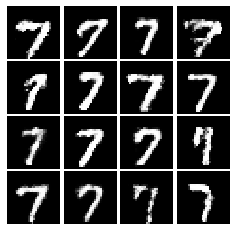

In [0]:
samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim),y:y_sample})
fig = plot(samples[:16])
plt.show()
print()
  